# Project 25 - Predicting Listing Gains in the Indian IPO Market Using TensorFlow

In this project our <b>task is to build a deep learning classification model to determine if there will be listing gains for the IPO</b>. Listing gains are the percentage increase in the share price of a company from its IPO issue price on the day of listing.

The dataset we'll be using for this project contains information on past IPOs in the Indian market and comes from [moneycontrol](https://www.moneycontrol.com/mccode/loginConsent.php?url=https://www.moneycontrol.com/ipo/ipo-historic-table?classic=true&classic=true).

## Reading in the Data

In [1]:
import pandas as pd
data = pd.read_csv('Indian_IPO_Market_Data.csv')
print(data.shape)
data.head(5)

(319, 9)


,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


Our table contains 319 rows and 9 columns. The columns are the following:

| Column name | Description |
|-------------|-------------|
|Date | date when the IPO was listed |
|IPOName| name of the IPO |
|Issue_Size| size of the IPO issue, in INR Crores |
|Subscription_QIB| number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category |
|Subscription_HNI| number of times the IPO was subscribed by the HNI (High Networth Individual) investor category|
|Subscription_RII| number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category |
|Subscription_Total| total number of times the IPO was subscribed overall|
|Issue_Price| the price in INR at which the IPO was issued|
|Listing_Gains_Percent | the percentage gain in the listing price over the issue price |

In [2]:
data.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Infinite Comp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


In [3]:
data.dtypes

Date                      object
IPOName                   object
Issue_Size               float64
Subscription_QIB         float64
Subscription_HNI         float64
Subscription_RII         float64
Subscription_Total       float64
Issue_Price                int64
Listing_Gains_Percent    float64
dtype: object

## Exploring the Data

From the summary table we can see that `Listing_Gains_Percent` contains negative and positive values. We will create a new categorical target variable `Listing_Gains_Profit` with values 1 (positive) and 0 (negative).

In [4]:
data['Listing_Gains_Profit'] = data['Listing_Gains_Percent'].apply(lambda x: 1 if x >= 0 else 0)
data.head(5)

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82,1
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21,0
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13,1
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28,0
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20,0


In [5]:
data['Listing_Gains_Profit'].value_counts(normalize=True)

Listing_Gains_Profit
1    0.551724
0    0.448276
Name: proportion, dtype: float64

From above we can see that 55% of the listings are profitable and 45% are not.

### Null values

In [6]:
data.isnull().sum()

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
Listing_Gains_Profit     0
dtype: int64

There are no null values in our data.

### Dropping Useless Columns

Now I will drop all the columns we won't be using for our model. These are `Date`, `IPOName` and `Listing_Gains_Percent`. We can't use `Listing_Gains_Percent` in our model, because it would obviously know the correct answer if it sees this data.

In [7]:
data = data.drop(columns = ['Date ', 'IPOName', 'Listing_Gains_Percent'], axis=1)
data.head(5)

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
0,189.80,48.44,106.02,11.08,43.22,165,1
1,328.70,59.39,51.95,3.79,31.11,145,0
2,56.25,0.99,16.60,6.25,5.17,75,1
3,199.80,1.12,3.65,0.62,1.22,165,0
4,0.00,0.52,1.52,2.26,1.12,75,0


## Data Visualization

Next I will make some plots for a clearer picture of our variables.

### Listing Gains Profit

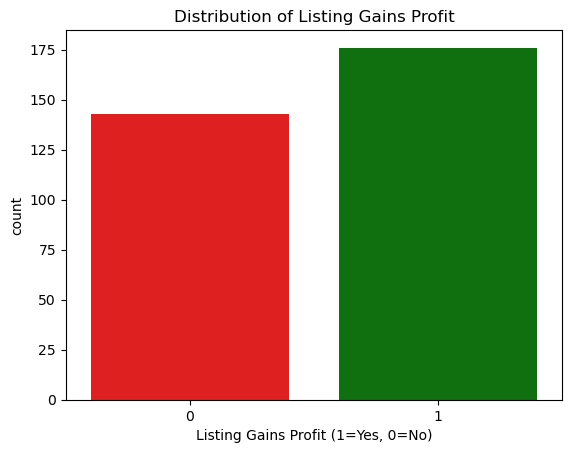

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='Listing_Gains_Profit', hue='Listing_Gains_Profit', palette=['red', 'green'], legend=False)
plt.title('Distribution of Listing Gains Profit')
plt.xlabel('Listing Gains Profit (1=Yes, 0=No)')
plt.show()

Above we have the count of `Listing Gains Profit`. We can see that there are less negative values (red bar) than positive values (green bar).

### Outliers

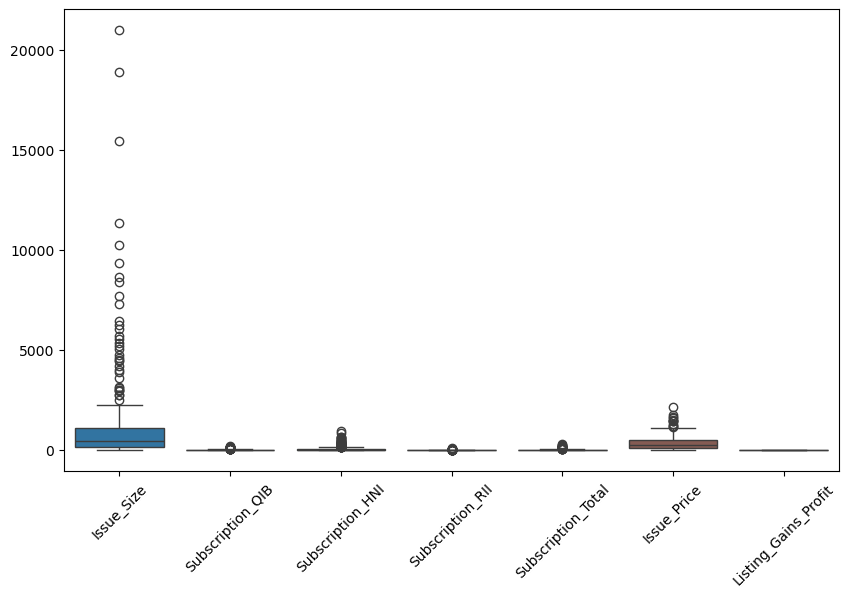

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

There are a lot of outliers in `Issue_Size`, `Subscription_HNI` and `Issue_Price`. There are some outliers in other columns too, which we can't see clearly yet. These outliers might affect the accuracy of our model, so we might have to deal with them later.

### Correlations

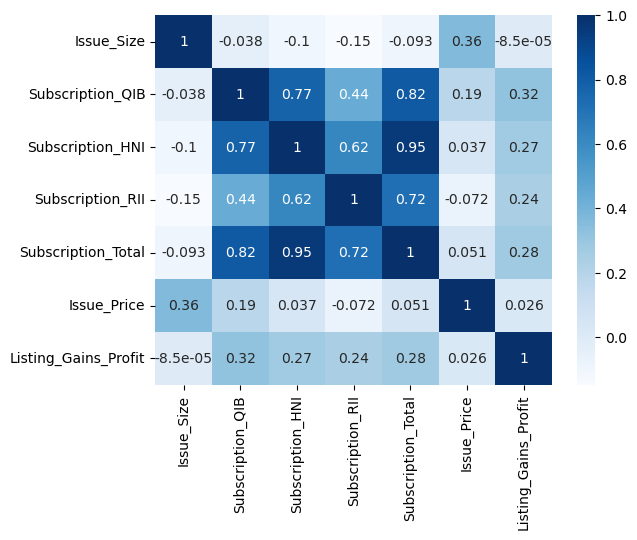

In [10]:
correlations = data.corr()
sns.heatmap(correlations, annot=True, cmap='Blues')
plt.show()

Our target variable `Listing_Gains_Profit` doesn't correlate much with other variables. However one good thing about this heatmap is that it shows that `Issue_Size` and `Issue_Price` have close to 0 correlation with `Listing_Gains_Profit`. Those two columns also had a lot of outliers, so this suggests that removing them from our variables might be a good idea. But first we will try a different method: let's change the upper outliers to upper quartile and lower outliers to lower quartile.

### Getting Rid of Outliers

In [11]:
data['Issue_Size'].describe()

count      319.000000
mean      1192.859969
std       2384.643786
min          0.000000
25%        169.005000
50%        496.250000
75%       1100.000000
max      21000.000000
Name: Issue_Size, dtype: float64

In [12]:
import numpy as np
size_lower = 169
size_upper = 1100
#np.where: condition, x, y -- where true yield x otherwise yield y
data['Issue_Size'] = np.where(data['Issue_Size'] < 169, size_lower, data['Issue_Size'])
data['Issue_Size'] = np.where(data['Issue_Size'] > 1100, size_upper, data['Issue_Size'])
data['Issue_Size'].describe()

count     319.00000
mean      578.64210
std       373.08157
min       169.00000
25%       169.50000
50%       496.25000
75%      1100.00000
max      1100.00000
Name: Issue_Size, dtype: float64

In [13]:
data['Issue_Price'].describe()

count     319.000000
mean      375.128527
std       353.897614
min         0.000000
25%       119.000000
50%       250.000000
75%       536.000000
max      2150.000000
Name: Issue_Price, dtype: float64

Now I will do the same for all columns.

In [14]:
price_lower = 119
price_upper = 536
#np.where: condition, x, y -- where true yield x otherwise yield y
data['Issue_Price'] = np.where(data['Issue_Price'] < 169, price_lower, data['Issue_Price'])
data['Issue_Price'] = np.where(data['Issue_Price'] > 1100, price_upper, data['Issue_Price'])

In [15]:
data['Subscription_HNI'].describe()

count    319.000000
mean      70.091379
std      142.454416
min        0.000000
25%        1.255000
50%        5.070000
75%       62.095000
max      958.070000
Name: Subscription_HNI, dtype: float64

In [16]:
HNI_lower = 1.255
HNI_upper = 62.1
#np.where: condition, x, y -- where true yield x otherwise yield y
data['Subscription_HNI'] = np.where(data['Subscription_HNI'] < 1.255, HNI_lower, data['Subscription_HNI'])
data['Subscription_HNI'] = np.where(data['Subscription_HNI'] > 62.1, HNI_upper, data['Subscription_HNI'])

In [17]:
data['Subscription_QIB'].describe()

count    319.000000
mean      25.684138
std       40.716782
min        0.000000
25%        1.150000
50%        4.940000
75%       34.635000
max      215.450000
Name: Subscription_QIB, dtype: float64

In [18]:
QIB_lower = 1.15
QIB_upper = 34.635
#np.where: condition, x, y -- where true yield x otherwise yield y
data['Subscription_QIB'] = np.where(data['Subscription_QIB'] < 1.15, QIB_lower, data['Subscription_QIB'])
data['Subscription_QIB'] = np.where(data['Subscription_QIB'] > 34.635, QIB_upper, data['Subscription_QIB'])

In [19]:
data['Subscription_RII'].describe()

count    319.000000
mean       8.561599
std       14.508670
min        0.000000
25%        1.275000
50%        3.420000
75%        8.605000
max      119.440000
Name: Subscription_RII, dtype: float64

In [20]:
RII_lower = 1.275
RII_upper = 8.605
#np.where: condition, x, y -- where true yield x otherwise yield y
data['Subscription_RII'] = np.where(data['Subscription_RII'] < 1.15, RII_lower, data['Subscription_RII'])
data['Subscription_RII'] = np.where(data['Subscription_RII'] > 8.605, RII_upper, data['Subscription_RII'])

In [21]:
data['Subscription_Total'].describe()

count    319.000000
mean      27.447147
std       48.772203
min        0.000000
25%        1.645000
50%        4.930000
75%       33.395000
max      326.490000
Name: Subscription_Total, dtype: float64

In [22]:
total_lower = 1.645
total_upper = 33.395
#np.where: condition, x, y -- where true yield x otherwise yield y
data['Subscription_Total'] = np.where(data['Subscription_Total'] < 1.645, total_lower, data['Subscription_Total'])
data['Subscription_Total'] = np.where(data['Subscription_Total'] > 33.395, total_upper, data['Subscription_Total'])

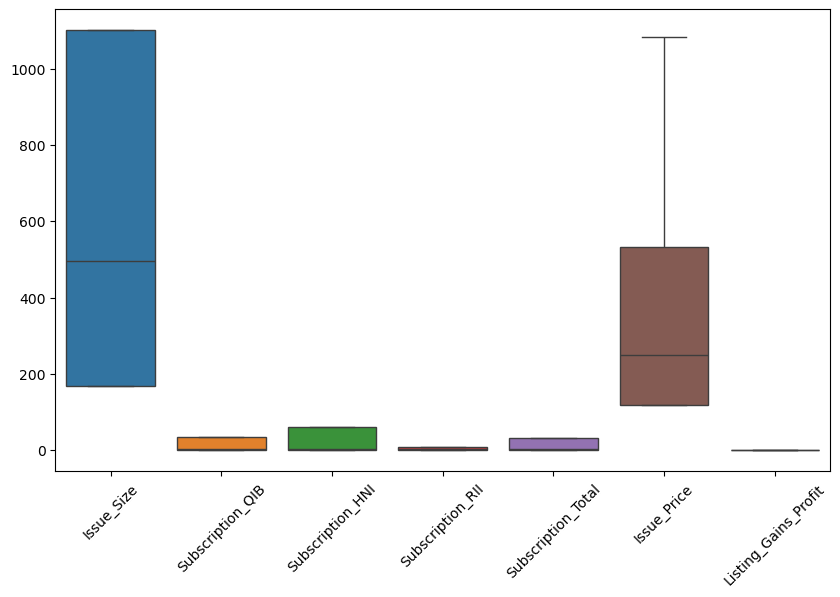

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

Now we got rid of the outliers by changing all the high value outliers to upper quartile and low value outliers to lower quartile. We should now get a more stable model, because the outliers would have affected the model a lot.

## Setting the Target and Predictor Variables

Now we are done with cleaning our data. Next we are going to assign predictors and target variables and normalize the predictors to contain values 0 to 1. I will do this manually using the following formula:

$$ \text{Normalized variable} = \frac{\text{variable}}{\text{max value of variable}} $$

In [24]:
data.columns

Index(['Issue_Size', 'Subscription_QIB', 'Subscription_HNI',
       'Subscription_RII', 'Subscription_Total', 'Issue_Price',
       'Listing_Gains_Profit'],
      dtype='object')

In [25]:
predictors = ['Issue_Size', 'Subscription_QIB', 'Subscription_HNI',
       'Subscription_RII', 'Subscription_Total', 'Issue_Price']
target_variable = ['Listing_Gains_Profit']

data[predictors] = data[predictors]/data[predictors].max()
data[predictors].describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.526038,0.386219,0.362503,0.527331,0.391152,0.318730
std,0.339165,0.408934,0.419589,0.356107,0.402040,0.235395
min,0.153636,0.033203,0.020209,0.134805,0.049259,0.109880
25%,0.154091,0.033203,0.020572,0.150784,0.049334,0.109880
50%,0.451136,0.142630,0.081643,0.397443,0.147627,0.230840
75%,1.000000,0.988523,0.999678,0.996804,0.999775,0.492613
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the table above we can see that all the values are now between 0 and 1, so the normalization was successful.

## Splitting Data to Train And Test Set

I will be using 80-20 split for training and testing. To do this I will use `scikit learns` library.

In [26]:
from sklearn.model_selection import train_test_split

X = data[predictors]
y = data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(255, 6) (64, 6) (255, 1) (64, 1)
Listing_Gains_Profit
1                       138
0                       117
Name: count, dtype: int64
Listing_Gains_Profit
1                       38
0                       26
Name: count, dtype: int64


Both training and testing sets contain a good amount of 1 and 0, so we can continue with this split.

## Define the Deep Learning Classification Model

Now it is time to build the model. I will use `the Keras Sequential API in TensorFlow`. I will add 4 hidden layers and 1 output layer. The hidden layers will use `relu` as their activation and the output layer will use a `sigmoid` activation, because `sigmoid` is good for 0 and 1 values.

In [27]:
import tensorflow as tf
tf.random.set_seed(100)
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(X_train.shape[1],)))

model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and Train the Model

Next we are going to compile and train our model. To do this we need to specify an optimizer, a loss function and an evaluation metric.

For optimizer I will be using [Adam](https://keras.io/api/optimizers/adam/). For loss I will be using [BinaryCrossentropy](https://keras.io/api/losses/probabilistic_losses/), because it fits well for our binary outcome. For metrics I will use accuracy, because I am interested in how accurate the model is.

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, verbose=1)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.5867 - loss: 0.6880
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.4974 - loss: 0.6828
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.4974 - loss: 0.6796
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.4974 - loss: 0.6769
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.4974 - loss: 0.6747
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4974 - loss: 0.6727 
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4974 - loss: 0.6706 
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.4983 - loss: 0.6685
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.5262 - loss: 0.6665
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.5887 - loss: 0.6647
Epoch 11/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5889 - loss: 0.6634
Epoch 12/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6

From above we can see that the accuracy improves with more epochs - First the accuracy was only 0.5867, but at the end it is around 0.74. Let's now evaluate our model's performance.

## Model Evaluation

In [29]:
model.evaluate(X_train, y_train)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7453 - loss: 0.5591 


[0.5450096726417542, 0.7490196228027344]

In [30]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7188 - loss: 0.5546


[0.5392860770225525, 0.75]

Our training data has an accuracy of 74.53%, and our testing data has an accuracy of 71.88%. The lower the loss value is the better, and our training set had a loss value of 0.5591, while the testing set had a loss value of 0.5546.

The model performs slightly better with the train data. If the training data has higher accuracy, it could be because of overfitting, so in this case the model might overfit a little, but overall the training and testing accuracy are fairly close to each other, which is a good sign.

## Conclusion

In this project we built a Deep Learning Classification model using Keras in TensorFlow. We used a real-world IPO dataset and built a classifier algorithm to predict whether an IPO will list at profit or not.

We used the Sequential API to build the model, which is achieving a decent accuracy of 70.23% and 73.96% on training and test data, respectively. We see that the accuracy is consistent across the training and test datasets, which is a promising sign.

In this project we only build one simple model. With different parameters we could obtain even better results.